In [1]:
import datetime
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sktime.forecasting.trend import PolynomialTrendForecaster
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf




In [2]:
df = pd.read_csv("Products_Information.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df_resampled = df.resample('D').sum()

print(df_resampled)


                    id  store_nbr          sales  special_offer
date                                                           
2013-01-01     1586871      49005    2511.618999              0
2013-01-02     4762395      49005  496092.417944              0
2013-01-03     7937919      49005  361461.231124              0
2013-01-04    11113443      49005  354459.677093              0
2013-01-05    14288967      49005  477350.121229              0
...                ...        ...            ...            ...
2017-08-11  5333291667      49005  826373.722022          14179
2017-08-12  5336467191      49005  792630.535079           8312
2017-08-13  5339642715      49005  865639.677471           9283
2017-08-14  5342818239      49005  760922.406081           8043
2017-08-15  5345993763      49005  762661.935939          10605

[1688 rows x 4 columns]


/var/folders/l4/zzypv4g962z9znwm8cxmhf5h0000gn/T/ipykernel_39996/1666662220.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('D').sum()


In [3]:
df = pd.read_csv("Products_Information.csv")
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

df_resampled = df.resample('D').sum()

result = seasonal_decompose(df_resampled['sales'], model='additive', period=365)

trend_component = result.trend.dropna()
trend_component = trend_component['2014':]

trend_df = trend_component.to_frame()

trend_df.columns = ['Sales']

print(trend_df.head())







                    Sales
date                     
2014-01-01  455438.864097
2014-01-02  456012.269036
2014-01-03  456747.622829
2014-01-04  458024.076555
2014-01-05  459226.164507


/var/folders/l4/zzypv4g962z9znwm8cxmhf5h0000gn/T/ipykernel_39996/4040469698.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_resampled = df.resample('D').sum()


In [4]:
df_resampled = df_resampled['2014':]
df_resampled["sales_detrended"] = df_resampled["sales"] - trend_df['Sales']

In [5]:
df_resampled.dropna(inplace=True)

print(df_resampled.head())


                    id  store_nbr          sales  special_offer  \
date                                                              
2014-01-01  1157477607      49005    8602.065404              0   
2014-01-02  1160653131      49005  801011.226041              0   
2014-01-03  1163828655      49005  680672.845603              0   
2014-01-04  1167004179      49005  936628.886604              0   
2014-01-05  1170179703      49005  949618.788940              0   

            sales_detrended  
date                         
2014-01-01   -446836.798693  
2014-01-02    344998.957005  
2014-01-03    223925.222774  
2014-01-04    478604.810049  
2014-01-05    490392.624433  


In [6]:
data = df_resampled.copy().asfreq("D") 
            
data.head()

,id,store_nbr,sales,special_offer,sales_detrended
date,,,,,
2014-01-01,1157477607,49005,8602.065404,0,-446836.798693
2014-01-02,1160653131,49005,801011.226041,0,344998.957005
2014-01-03,1163828655,49005,680672.845603,0,223925.222774
2014-01-04,1167004179,49005,936628.886604,0,478604.810049
2014-01-05,1170179703,49005,949618.788940,0,490392.624433


In [7]:
trend_forecaster = PolynomialTrendForecaster(degree=1)


trend_forecaster.fit(y=data[["sales"]])


start_date = df.index.min()
end_date = df.index.max() + pd.DateOffset(weeks=2)
freq = "D"
fh = pd.date_range(start=start_date, end=end_date, freq=freq)


trend = trend_forecaster.predict(fh=fh)


In [8]:
print(trend)

                    sales
2013-01-01  370146.247069
2013-01-02  370478.981974
2013-01-03  370811.716879
2013-01-04  371144.451784
2013-01-05  371477.186689
...                   ...
2017-08-25  934797.380677
2017-08-26  935130.115582
2017-08-27  935462.850487
2017-08-28  935795.585392
2017-08-29  936128.320297

[1702 rows x 1 columns]


In [9]:
print(data)

                    id  store_nbr         sales  special_offer  \
date                                                             
2014-01-01  1157477607      49005  8.602065e+03              0   
2014-01-02  1160653131      49005  8.010112e+05              0   
2014-01-03  1163828655      49005  6.806728e+05              0   
2014-01-04  1167004179      49005  9.366289e+05              0   
2014-01-05  1170179703      49005  9.496188e+05              0   
...                ...        ...           ...            ...   
2017-02-10  4755346299      49005  7.522072e+05          12607   
2017-02-11  4758521823      49005  9.449247e+05           7840   
2017-02-12  4761697347      49005  1.074821e+06           8800   
2017-02-13  4764872871      49005  7.943144e+05           7527   
2017-02-14  4768048395      49005  6.426132e+05           9653   

            sales_detrended  
date                         
2014-01-01   -446836.798693  
2014-01-02    344998.957005  
2014-01-03    223925.

In [10]:
data["sales_detrended"] = data[["sales"]] - trend


In [11]:
data.head()

,id,store_nbr,sales,special_offer,sales_detrended
date,,,,,
2014-01-01,1157477607,49005,8602.065404,0,-482992.421952
2014-01-02,1160653131,49005,801011.226041,0,309084.003780
2014-01-03,1163828655,49005,680672.845603,0,188412.888437
2014-01-04,1167004179,49005,936628.886604,0,444036.194533
2014-01-05,1170179703,49005,949618.788940,0,456693.361964


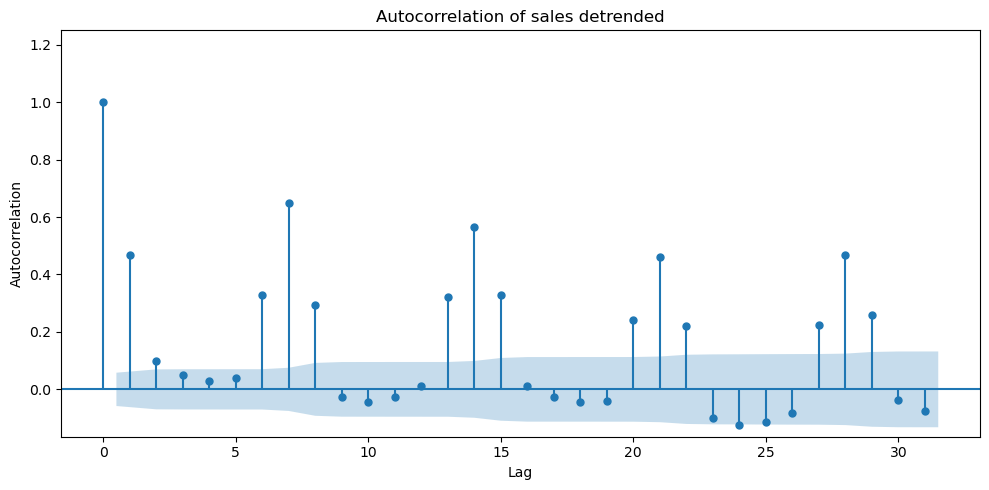

In [12]:
fig, ax = plt.subplots(figsize=[10, 5])
plot_acf(
    x=data["sales_detrended"],
    lags=31,
    ax=ax,
    alpha=0.05,
    auto_ylims=True
)
ax.set_title("Autocorrelation of sales detrended")
ax.set_ylabel("Autocorrelation")
ax.set_xlabel("Lag")
plt.tight_layout()

plt.savefig("autocorrelation_plot2.png")

In [13]:
data.head()

,id,store_nbr,sales,special_offer,sales_detrended
date,,,,,
2014-01-01,1157477607,49005,8602.065404,0,-482992.421952
2014-01-02,1160653131,49005,801011.226041,0,309084.003780
2014-01-03,1163828655,49005,680672.845603,0,188412.888437
2014-01-04,1167004179,49005,936628.886604,0,444036.194533
2014-01-05,1170179703,49005,949618.788940,0,456693.361964


# END OF ACF PLOT

# CORRELATIONAL HEATMAP FOR LAG 1

### WARNING - please place the file in the same directory as the dataset csv file

##### importing the necessary modules

In [14]:
# necessary imports
import pandas as pd
import numpy as np
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import TimeSeriesSplit, RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import time

## Importing the dataset

In [15]:
# importing data
data = pd.read_csv('Products_Information.csv')

# as the date is an 'object', changing it into datetime64(ms) format
data['date'] = pd.to_datetime(data['date'])

# setting the date as index
data.set_index('date', inplace=True)



##### Removing Outliers

In [16]:
data = data[data['sales'] <= 40000]

##### extracting date features from date index

In [17]:
# breaking the date into day_of_week, month and day_of_month
data['day_of_week'] = data.index.dayofweek
data['month'] = data.index.month
data['day_of_month'] = data.index.day


In [18]:
# storing our data into a new variable 
data_encoded = data.copy(deep=True)

##### Lagged Feature and Rolling Windows

In [19]:
# lagged feature capturing the sales data of the previous week's same day and past day

data_encoded['sales_lag_1'] = data_encoded.groupby(['store_nbr', 'product_type'])['sales'].shift(1)

data_encoded['sales_lag_7'] = data_encoded.groupby(['store_nbr', 'product_type'])['sales'].shift(7)

# rolling windows 
data_encoded['rolling_window_7_skew'] = data_encoded.groupby(['store_nbr', 'product_type'])['sales'].shift(1).rolling(window=7).skew()

data_encoded['rolling_window_7_std'] = data_encoded.groupby(['store_nbr', 'product_type'])['sales'].shift(1).rolling(window=7).std()


## Label Encoding product_type

In [20]:
label_encoder = LabelEncoder()

data_encoded['product_type'] = label_encoder.fit_transform(data['product_type'])

# removing the id column for preparation of training and prediction datasets


In [21]:
data_encoded = data_encoded.drop('id',axis = 1)

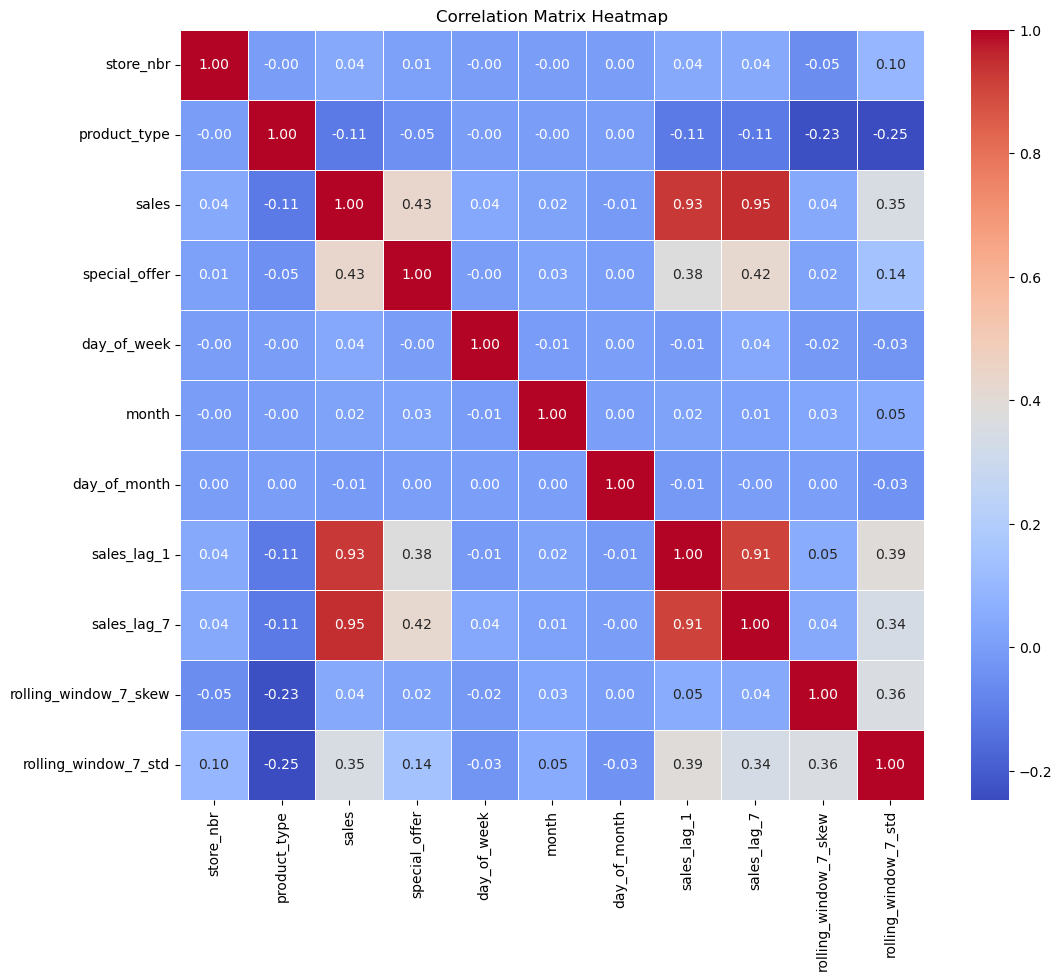

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_encoded' is your DataFrame
# Calculate the correlation matrix
correlation_matrix = data_encoded.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


# END OF FILE